In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

fileurl = ('https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv')
df = pd.read_csv(fileurl, delimiter=',', index_col='Customer Id')

In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


Unnamed: 0           0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [8]:
df.drop(columns='Unnamed: 0', inplace = True)
df.sample(10)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
691,21,1,1,16,0.141,0.867,0.0,6.3
196,35,3,5,30,1.526,1.654,NaN,10.6
717,35,1,9,34,0.398,1.302,0.0,5.0
610,27,2,8,38,0.364,2.258,0.0,6.9
746,45,1,23,50,0.559,1.541,0.0,4.2
686,41,4,14,44,0.353,0.395,0.0,1.7
182,33,2,13,40,0.181,2.699,0.0,7.2
744,31,2,6,32,3.341,4.051,1.0,23.1
477,43,2,6,54,0.622,4.562,0.0,9.6


In [9]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [12]:
df['Defaulted'].fillna((df['Defaulted'].max()), inplace=True)

In [13]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        850 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

# Modelo KMeans 

In [17]:
# Escalamos data
scaler = StandardScaler()
# Transformar data
df_escalado = scaler.fit_transform(df)
#Instancia de Kmeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_escalado)

KMeans(n_clusters=3)

In [18]:
kmeans.labels_

array([1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0,
       2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2,

In [26]:
df['cluster'] = kmeans.labels_
df.head()
df['cluster'].value_counts()

1    523
2    191
0    136
Name: cluster, dtype: int64

# Visualizaciones KMeans

Text(0, 0.5, 'Card Debt')

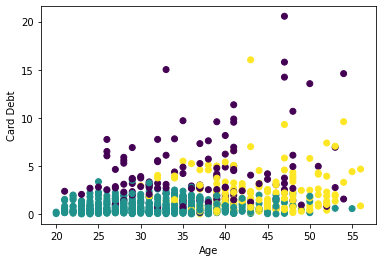

In [23]:
plt.scatter(df['Age'], df['Card Debt'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Card Debt')

Text(0, 0.5, 'DebtIncomeRatio')

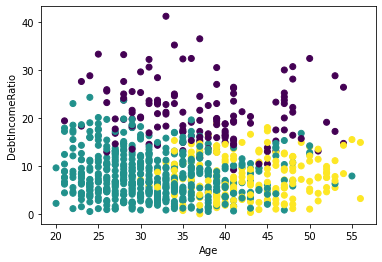

In [25]:
plt.scatter(df['Age'], df['DebtIncomeRatio'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('DebtIncomeRatio')

Text(0, 0.5, 'DebtIncomeRadio')

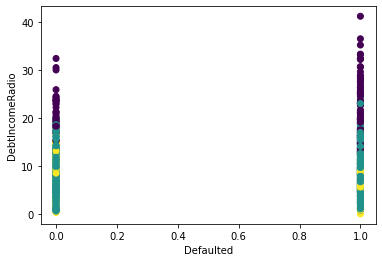

In [24]:
plt.scatter(df['Defaulted'], df['DebtIncomeRatio'], c = df['cluster'])
plt.xlabel('Defaulted')
plt.ylabel('DebtIncomeRadio')

In [31]:
# RESUMEN
cluster1 = df[df['cluster']==0]
cluster2 = df[df['cluster']==1]
cluster3 = df[df['cluster']==2]
moac =  [cluster1, cluster2, cluster3]
for clust in moac:
  print(clust.describe())


              Age         Edu  ...  DebtIncomeRatio  cluster
count  136.000000  136.000000  ...       136.000000    136.0
mean    37.066176    1.977941  ...        20.972794      0.0
std      7.509206    0.992318  ...         5.956291      0.0
min     21.000000    1.000000  ...         9.300000      0.0
25%     31.000000    1.000000  ...        16.500000      0.0
50%     37.000000    2.000000  ...        19.900000      0.0
75%     41.000000    3.000000  ...        24.525000      0.0
max     54.000000    4.000000  ...        41.300000      0.0

[8 rows x 9 columns]
              Age         Edu  ...  DebtIncomeRatio  cluster
count  523.000000  523.000000  ...       523.000000    523.0
mean    31.613767    1.604207  ...         8.195602      1.0
std      6.567944    0.847659  ...         4.619437      0.0
min     20.000000    1.000000  ...         0.600000      1.0
25%     27.000000    1.000000  ...         4.700000      1.0
50%     31.000000    1.000000  ...         7.400000      1.0
75

In [32]:
edadpromedio = [np.mean(clustr['Age']) for clustr in moac]
incomepromedio = [np.mean(clustr['DebtIncomeRatio']) for clustr in moac]
carddebtpromedio = [np.mean(clustr['Card Debt']) for clustr in moac]
df_resumen = pd.DataFrame({'Clustr': ['cluster1','cluster2','cluster3'],
                           'Edad promedio': edadpromedio,
                           'Income promedio': incomepromedio,
                           'Tarjeta deuda': carddebtpromedio})

Text(0, 0.5, 'Edad Promedio')

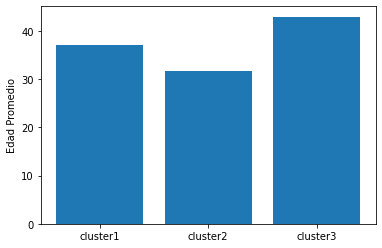

In [33]:
plt.bar(df_resumen['Clustr'], df_resumen['Edad promedio'])
plt.ylabel('Edad Promedio')

Text(0, 0.5, 'Ingresos Promedio')

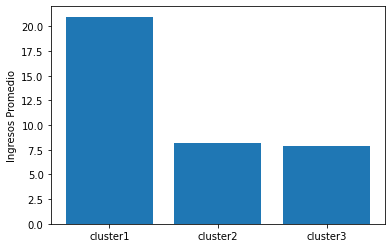

In [34]:
plt.bar(df_resumen['Clustr'], df_resumen['Income promedio'])
plt.ylabel('Ingresos Promedio')

Text(0, 0.5, 'Deuda Tarjeta')

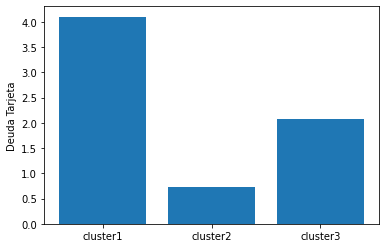

In [35]:
plt.bar(df_resumen['Clustr'], df_resumen['Tarjeta deuda'])
plt.ylabel('Deuda Tarjeta')

# Conclusiones

Con un modelo definido con 3 agrupaciones, el cluster 1 muestra clientes con mayores ingresos, mayor deuda en tarjeta de crédito y su edad promedio es de 37 años.
El cluster 2 muestra clientes de promedio de edad de 31 años, ingresos al 1/3 en comparación de el cluster 1, y la deuda en tarjeta de crédito más baja de todos los grupos.